In [1]:
# mieyhgnaj set 🤪

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno
import plotly.express as px
from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

import warnings
warnings.filterwarnings("ignore")

## 🚙 `타깃 컬럼을 제외한 컬럼은 SOCAR 측의 요청대로 비공개 처리!`

# kmeans를 이용하여 결측치 채우기
: null값이 많은 컬럼 (x14, x15, x23)

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
import time
from collections import Counter

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced

In [5]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
train = pd.read_csv('datas/train_out.csv', index_col=0)
test = pd.read_csv('datas/test_encode_ver2.csv', index_col=0)

In [9]:
import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):

    missing = X==0
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            cls = KMeans(n_clusters, n_jobs=-1)

        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        X_hat[missing] = centroids[labels][missing]

        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

In [10]:
cost = train[['x15', 'x14', 'x23']]
cost = cost.to_numpy()

In [11]:
cost

array([[      0.    ,  130254.678 ,       0.    ],
       [      0.    , 1341009.163 ,       0.    ],
       [1209410.    ,  524030.5696,       0.    ],
       ...,
       [      0.    ,  618439.4418,       0.    ],
       [      0.    ,       0.    ,       0.    ],
       [1188750.    ,  391560.2156,       0.    ]])

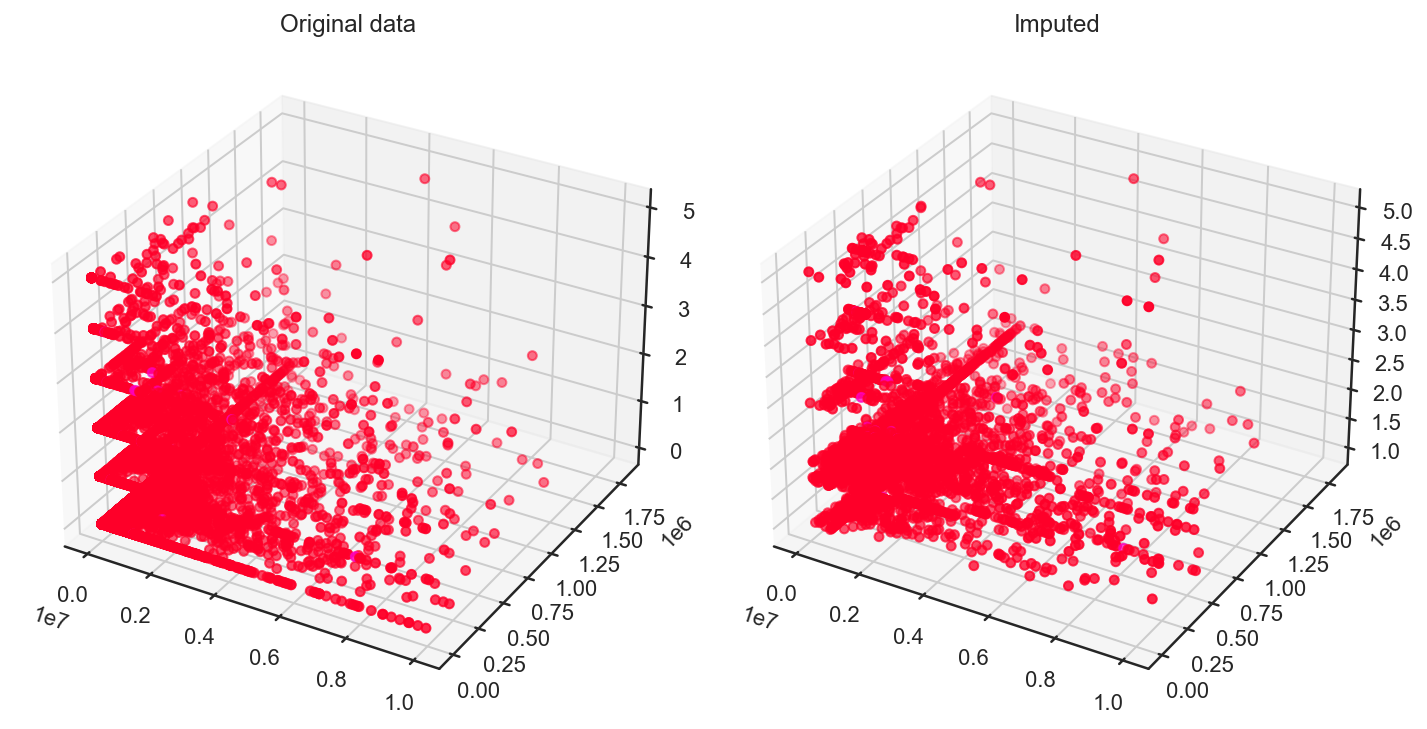

In [12]:
labels, centroids, cost_hat = kmeans_missing(cost, n_clusters=4)
true_labels = train['fraud_YN'].to_numpy()

# plot the inferred points, color-coded according to the true cluster labels
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'3d'}, figsize=(10,5))
ax[0].scatter3D(cost[:, 0], cost[:, 1], cost[:, 2], c=true_labels, cmap='gist_rainbow')
ax[1].scatter3D(cost_hat[:, 0], cost_hat[:, 1], cost_hat[:, 2], c=true_labels,
                cmap='gist_rainbow')
ax[0].set_title('Original data')
ax[1].set_title('Imputed')
fig.tight_layout()

In [13]:
# Plotting 3D interactive graph with Plotly Express:
import plotly.express as px
fig = px.scatter_3d(cost, x=cost[:, 0], y=cost[:, 1],
                    z=cost[:, 2], color=true_labels, opacity=0.7)
fig.show()

In [14]:
# Plotting 3D interactive graph with Plotly Express:
import plotly.express as px
fig = px.scatter_3d(cost_hat, x=cost_hat[:, 0], y=cost_hat[:, 1],
                    z=cost_hat[:, 2], color=true_labels, opacity=0.7)
fig.show()

In [15]:
cost_hat

array([[6.21397927e+05, 1.30254678e+05, 1.74323047e+00],
       [6.21397927e+05, 1.34100916e+06, 1.74323047e+00],
       [1.20941000e+06, 5.24030570e+05, 1.74323047e+00],
       ...,
       [6.21397927e+05, 6.18439442e+05, 1.74323047e+00],
       [6.21397927e+05, 3.72866341e+05, 1.74323047e+00],
       [1.18875000e+06, 3.91560216e+05, 1.74323047e+00]])

In [16]:
train[['x15', 'x14', 'x23']]

x15           x14  x23
0            0  130254.67800    0
1            0 1341009.16300    0
2      1209410  524030.56960    0
3      1217280       0.00000    3
4            0       0.00000    3
...        ...           ...  ...
12874        0  667293.08700    0
12875        0       0.00000    0
12876        0  618439.44180    0
12877        0       0.00000    0
12878  1188750  391560.21560    0

[12879 rows x 3 columns]

In [17]:
filled_null = pd.DataFrame(cost_hat, columns=[['x15', 'x14', 'x23']])

In [18]:
filled_null['x23'] = round(filled_null['x23'])

In [19]:
# null값 채워진 data
filled_null

x15           x14     x23
0      621397.92729  130254.67800 2.00000
1      621397.92729 1341009.16300 2.00000
2     1209410.00000  524030.56960 2.00000
3     1217280.00000  372866.34147 3.00000
4      621397.92729  372866.34147 3.00000
...             ...           ...     ...
12874  621397.92729  667293.08700 2.00000
12875  621397.92729  372866.34147 2.00000
12876  621397.92729  618439.44180 2.00000
12877  621397.92729  372866.34147 2.00000
12878 1188750.00000  391560.21560 2.00000

[12879 rows x 3 columns]

## 데이터 교체

In [20]:
train_filled = train.copy()

In [21]:
train_filled[['x15', 'x14', 'x23']] = filled_null

In [22]:
train_filled.to_csv('datas/train_out_filled_kmeans.csv')

In [23]:
train_filled

fraud_YN  x2  x4  x5   x7  x8  x9  x10           x14           x15  \
0             0   1   0   2  100   2   0    0  130254.67800  621397.92729   
1             0   1   0   4    0   2   0    0 1341009.16300  621397.92729   
2             0   0   0   1  100   1   0    0  524030.56960 1209410.00000   
3             1   1   0   4  100   3   0    0  372866.34147 1217280.00000   
4             0   0   0   4    0   1   0    0  372866.34147  621397.92729   
...         ...  ..  ..  ..  ...  ..  ..  ...           ...           ...   
12874         0   0   1   4  100   1   0    0  667293.08700  621397.92729   
12875         0   0   0   2  100   2   0    0  372866.34147  621397.92729   
12876         0   0   1   4  100   1   1    0  618439.44180  621397.92729   
12877         0   0   0   2  100   2   0    0  372866.34147  621397.92729   
12878         0   0   0   1  100   1   0    0  391560.21560 1188750.00000   

       ...  x16_0  x16_1  x16_2  x16_3  x16_4  x16_5  x20_0  x20_1  x20_2  \
0      ...      0      1      0      0      0      0      1      0      0   
1      ...      0      0      0      1      0      0      1      0      0   
2      ...      0      1      0      0      0      0      1      0      0   
3      ...      1      0      0      0      0      0      0      1      0   
4      ...      0      1      0      0      0      0      0      1      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12874  ...      1      0      0      0      0      0      1      0      0   
12875  ...      0      1      0      0      0      0      1      0      0   
12876  ...      0      0      1      0      0      0      1      0      0   
12877  ...      0      0      0      0      1      0      1      0      0   
12878  ...      0      0      1      0      0      0      1      0      0   

       x20_3  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
12874      0  
12875      0  
12876      0  
12877      0  
12878      0  

[12879 rows x 51 columns]

In [24]:
# 이건 그대로
test

fraud_YN  x2  x4  x5   x7  x8  x9  x10           x14       x15  ...  \
0            0   0   0   4    0   3   1    0       0.00000         0  ...   
1            0   0   1   4  100   3   1    0  258130.57980  12925040  ...   
2            0   1   0   1  100   1   0    1       0.00000   4777030  ...   
3            0   1   0   4  100   3   1    0  268062.49900    250000  ...   
4            0   0   0   4  100   1   0    1  597313.76120         0  ...   
...        ...  ..  ..  ..  ...  ..  ..  ...           ...       ...  ...   
3116         0   0   0   4  100   3   0    0       0.00000   1708720  ...   
3117         0   0   0   4  100   3   0    0       0.00000         0  ...   
3118         0   0   0   1  100   1   0    0  349848.59720    810230  ...   
3119         0   0   0   2  100   3   0    0 1086346.80900         0  ...   
3120         0   1   0   4  100   1   0    0       0.00000         0  ...   

      x16_0  x16_1  x16_2  x16_3  x16_4  x16_5  x20_0  x20_1  x20_2  x20_3  
0         0      1      0      0      0      0      0      1      0      0  
1         0      0      0      1      0      0      0      1      0      0  
2         0      1      0      0      0      0      0      1      0      0  
3         0      0      1      0      0      0      0      1      0      0  
4         0      0      1      0      0      0      1      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
3116      1      0      0      0      0      0      0      1      0      0  
3117      0      0      0      0      1      0      1      0      0      0  
3118      1      0      0      0      0      0      0      1      0      0  
3119      0      0      0      0      1      0      1      0      0      0  
3120      1      0      0      0      0      0      1      0      0      0  

[3121 rows x 51 columns]